In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / "src"))
print(sys.path[-1])

/Users/hawkins/code/hBN_PL/src


In [2]:
#import modules
import hbn_pl.io as io
import hbn_pl.preprocess as preprocess
import hbn_pl.plot as plot
import hbn_pl.peaks as peaks
import hbn_pl.peaks2 as peaks2
import hbn_pl.classification2 as classification
import csv

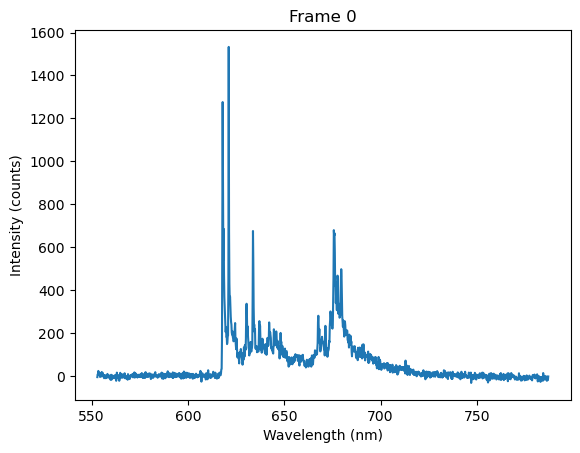

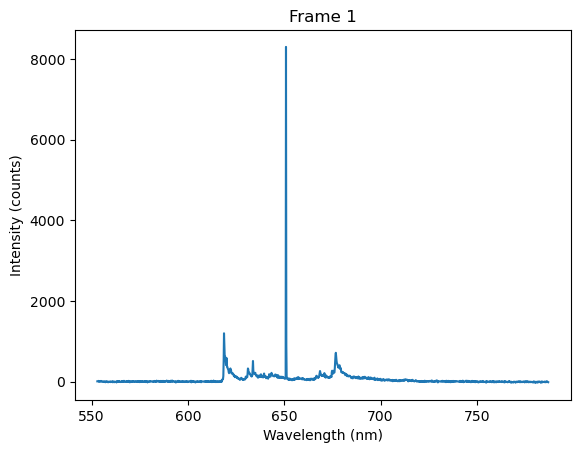

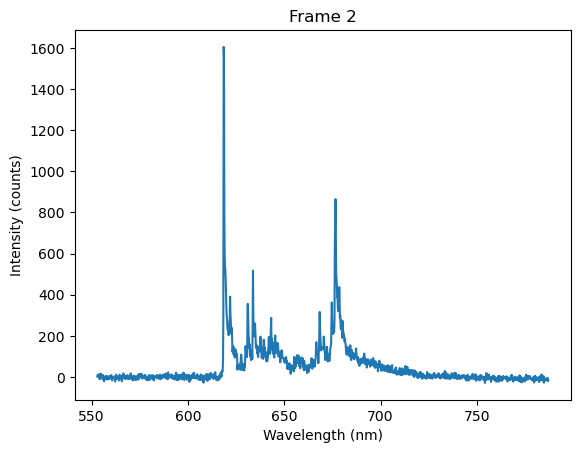

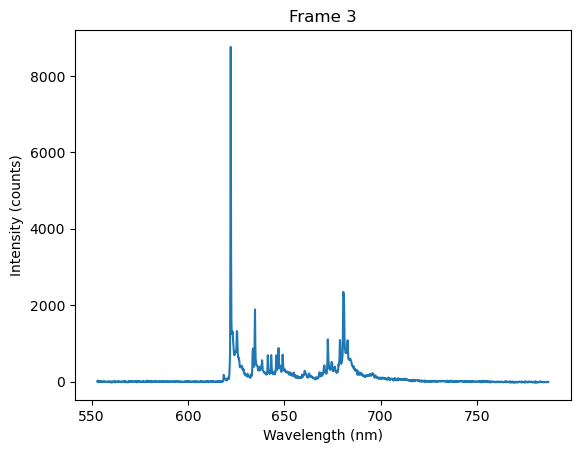

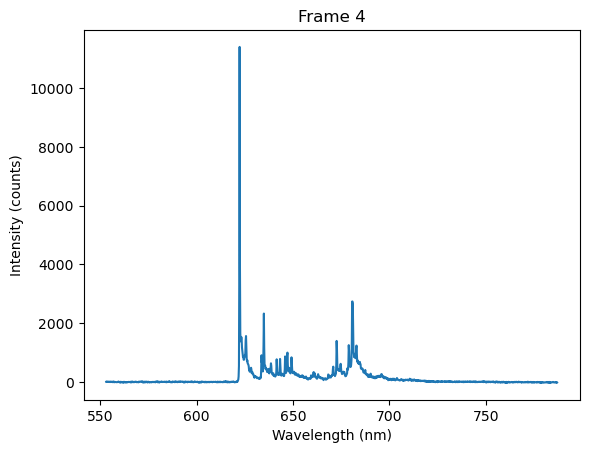

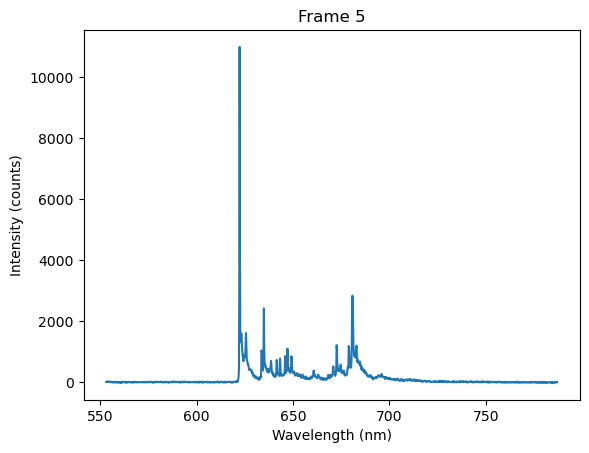

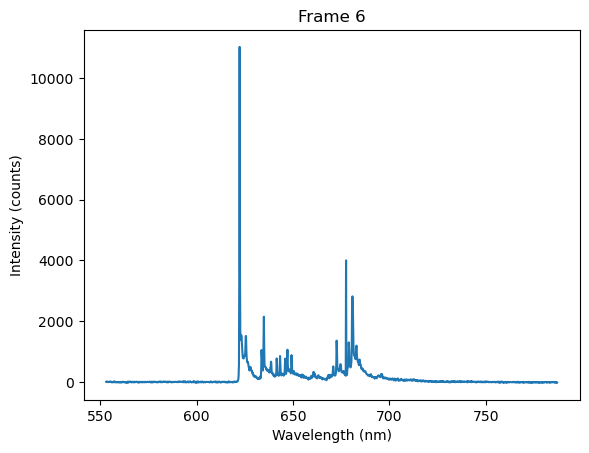

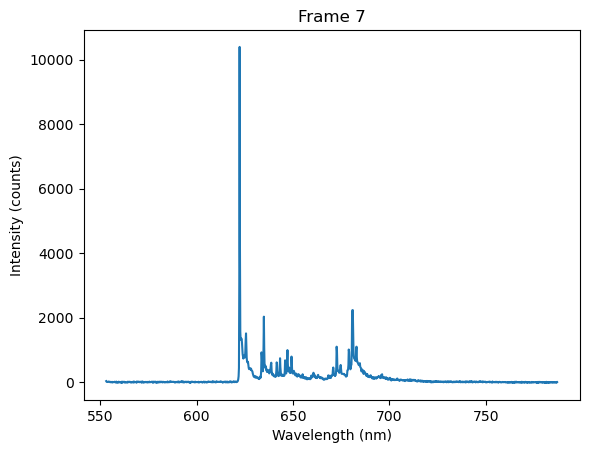

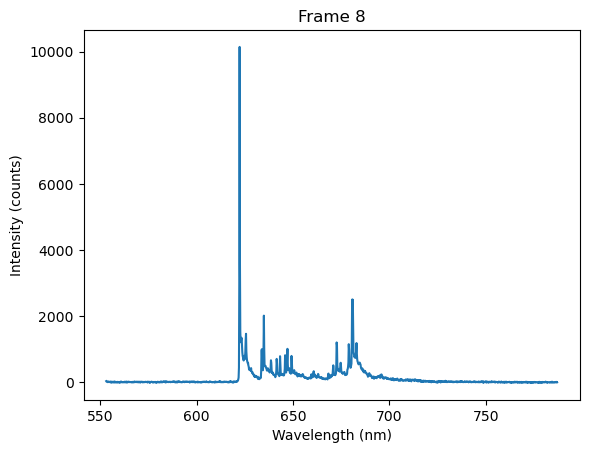

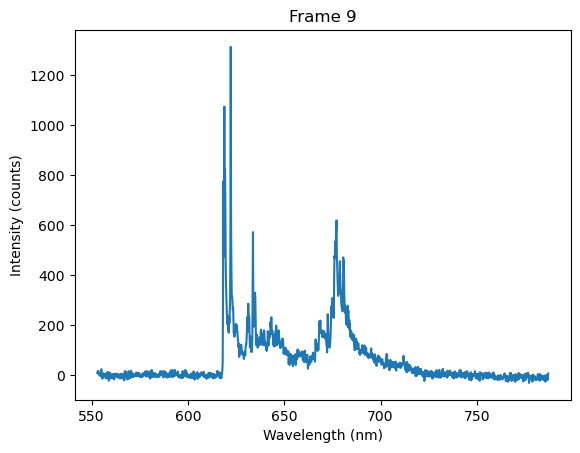

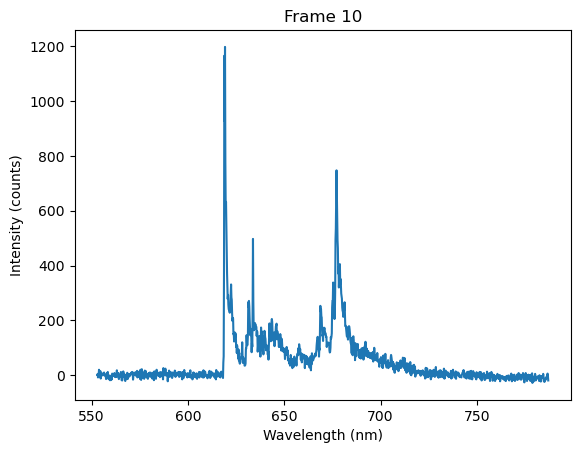

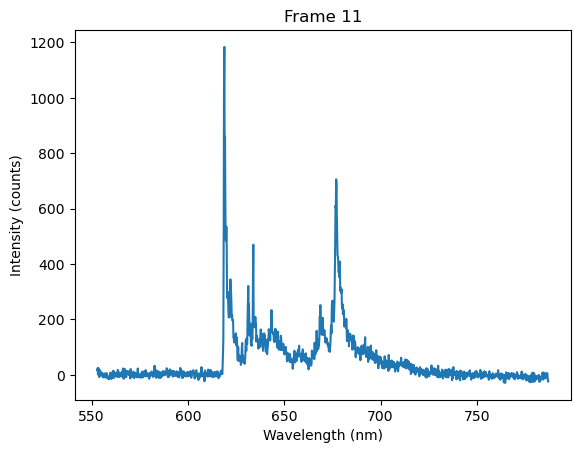

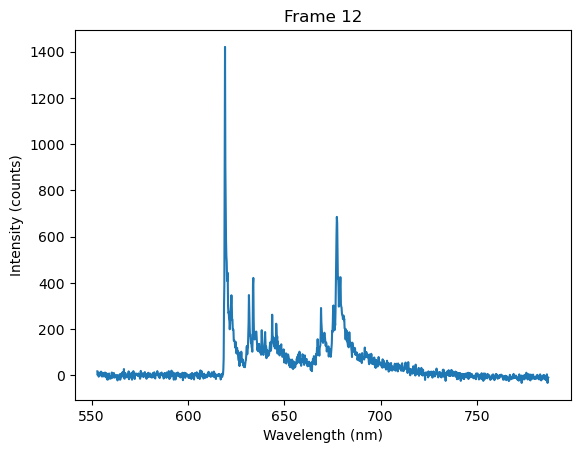

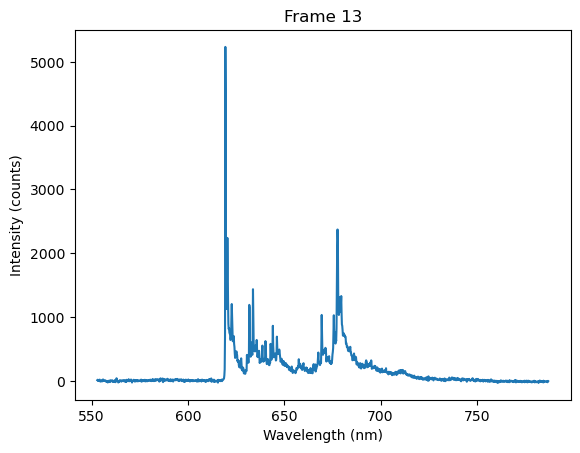

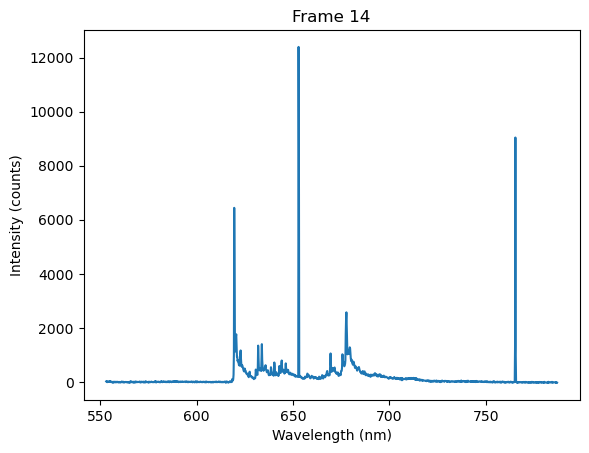

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

In [3]:
# load test emitter data
DATA_DIR = Path("/Users/hawkins/code/hBN_PL/data/All data")
#FILE_NAME = '2025-11-20 18_51_06 sample3_DCMd2_200uw_emitter14 2231.spe'
FILE_NAME = '2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189.spe'
#FILE_NAME = '2025-11-17 17_59_53 sample5_DCMd2_200uw_emitter17 2195.spe'
spe_path = DATA_DIR / FILE_NAME
wavelength, frames = io.load_spe(spe_path)
frames = frames[0:15]

# pre-process and plot for visual check
frames = preprocess.background_subtract(frames, bg_slice=(1, 50))
plot.plot_frames(wavelength, frames)

Detected 2 cosmic ray frames: [3, 13]


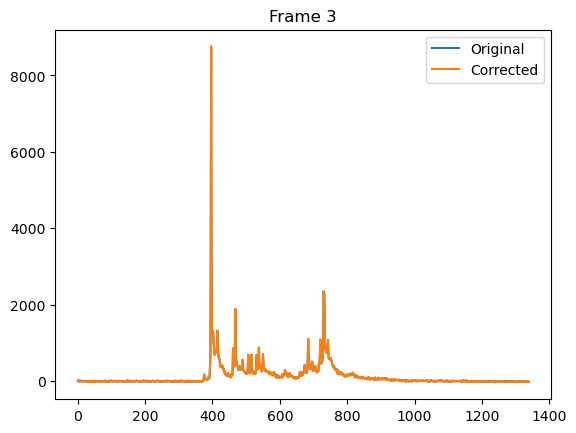

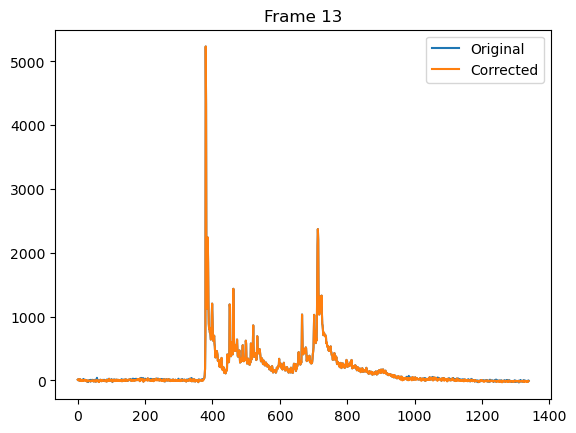

In [4]:
# Cosmic ray removal
frames_norm = preprocess.normalise(frames)
cosmic_frames = preprocess.detect_cosmic_frames(frames_norm, sigma_threshold=90, min_outliers=3)
frames = preprocess.remove_cosmic_rays(frames, cosmic_frames, sigma=2.5)

In [5]:
#bad frame removal
drop_fraction = 0.6
bad_frames = preprocess.detect_bad_frames_simple(frames, drop_fraction = drop_fraction)

Detected bad frames due to intensity drop 0.6: [ 0  1  2  9 10 11 12]


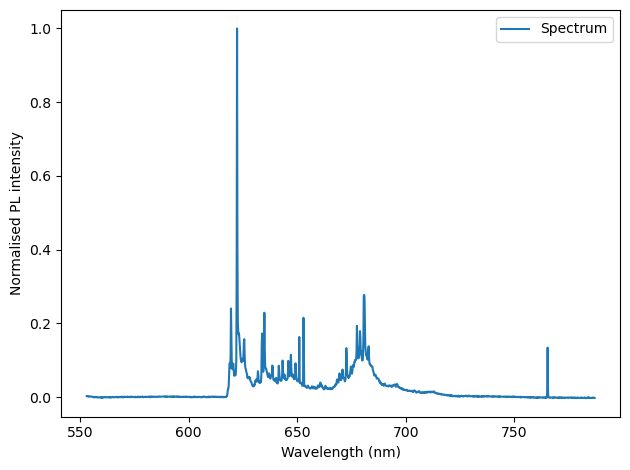

In [6]:
# average and normalise
avg, avg_norm = preprocess.average_and_normalise(frames)
plot.plot_spectrum(wavelength, avg_norm)

Detected peaks:
{'location': np.float64(619.4671486652222), 'intensity': np.float64(0.24017068143445014), 'fwhm': np.float64(0.3497530402122493), 'prominence': np.float64(0.18255184032862057)}
{'location': np.float64(622.2651575423462), 'intensity': np.float64(1.0), 'fwhm': np.float64(0.1748746357637856), 'prominence': np.float64(1.00221528933372)}
{'location': np.float64(633.8065899305377), 'intensity': np.float64(0.1723460992147509), 'fwhm': np.float64(0.5245968133687029), 'prominence': np.float64(0.10395292403573697)}
{'location': np.float64(634.855780407803), 'intensity': np.float64(0.22870989394386065), 'fwhm': np.float64(0.5245941075584142), 'prominence': np.float64(0.19989225056828838)}
{'location': np.float64(650.9426357271755), 'intensity': np.float64(0.16289990327524168), 'fwhm': np.float64(0.17484918341483535), 'prominence': np.float64(0.12627758300178105)}
{'location': np.float64(652.8659643784006), 'intensity': np.float64(0.21492113399424526), 'fwhm': np.float64(0.34969404

/var/folders/8g/5d8vd9052js99py85nx9jxz00000gn/T/ipykernel_3671/3442268719.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


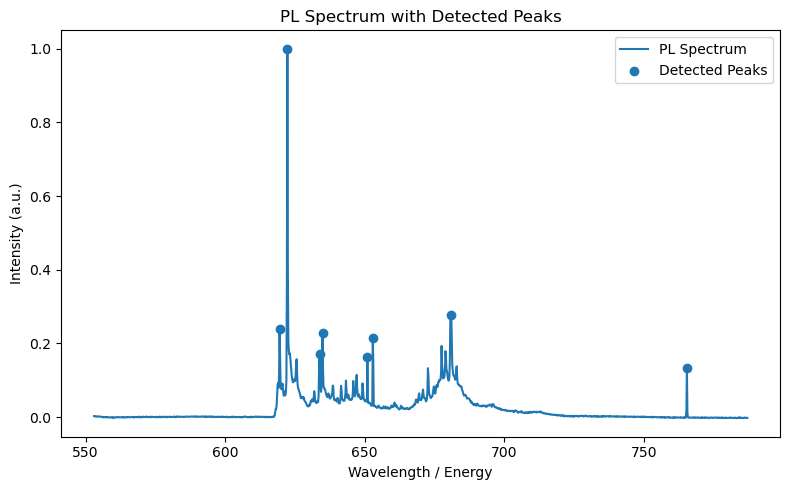

In [7]:
# peak detection
finder = peaks2.PeakFinder(wavelength, avg_norm)
finder.peak_finding(prominence=0.1)
peaks = finder.extract_peak_parameters()

print("Detected peaks:")
for p in peaks:
    print(p)

fig = finder.plot_peaks()
fig.show()

In [8]:
#classify peaks
classifier = classification.ZPLClassification(peaks, thresholds={
            "max_fwhm": 0.9,           
            "min_prominence": 0.7,   
            "location_range": [615, 660]    
        })

msg, zpl_peaks = classifier.classify()

print(msg)

Single ZPL
Peak 1: location = 622.3, prominence = 1.0


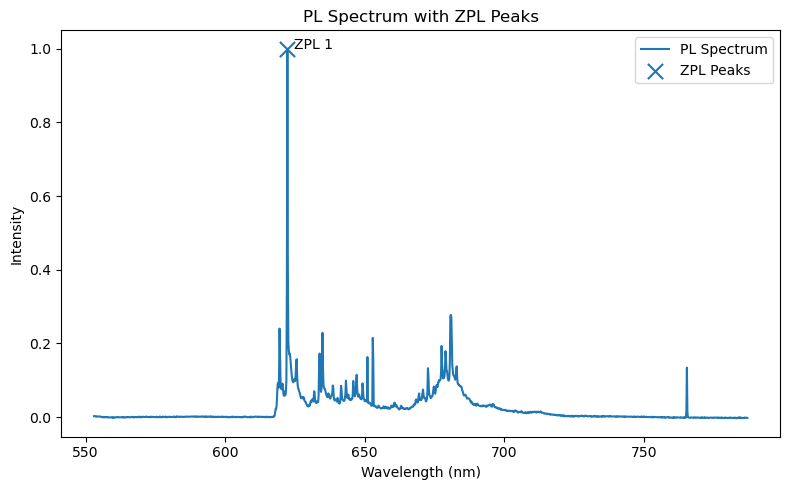

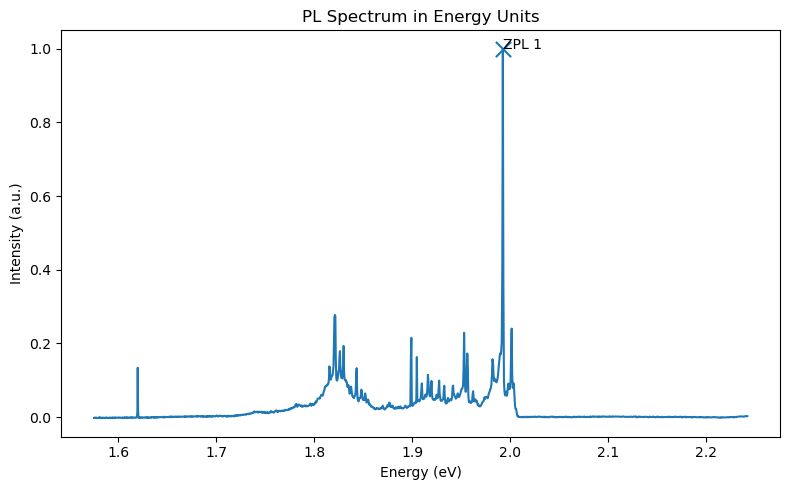

In [9]:
# plot final wavelength and energy plots
zpl_fig = finder.plot_zpl_on_spectrum(zpl_peaks)
energy_fig = finder.plot_energy(zpl_peaks)


In [10]:
# save outputs
OUTPUT_DIR = Path("/Users/hawkins/code/hBN_PL/output") # Main directory of all outputs
io.output(peaks, 
               msg, 
               OUTPUT_DIR, 
               FILE_NAME, 
               wavelength, 
               frames, 
               plot, 
               finder=finder,
               zpl_peaks = zpl_peaks)

Peakfinder outputs for emitter '2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189.spe' saved in:
/Users/hawkins/code/hBN_PL/output/2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189. 

Created emitter output directory: /Users/hawkins/code/hBN_PL/output/2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189
Saved CSV file in emitter output directory
Saved original frame plots (15 frames) in: emitter output directory/original_frames
Saved peak plot in: emitter output directory/found_peaks
Saved ZPL wavelength plot in: emitter output directory/ZPL_plots
Saved ZPL energy plot in: emitter output directory/ZPL_plots
